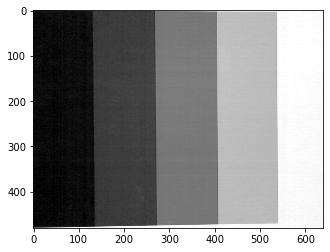

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def einlesen(bild):
    img = imageio.imread(bild)
    img = img.astype('double')
    return img

def ausgeben(img):
    plt.imshow(img/gbild.max())
    plt.show()


gbild = einlesen('Grauwertkeil.png')
ausgeben(gbild)

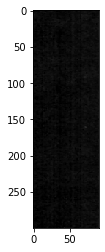

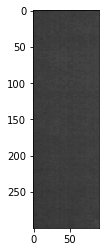

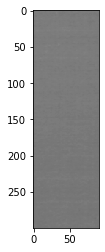

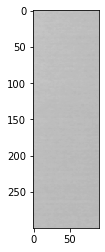

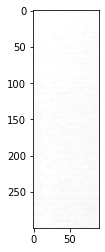

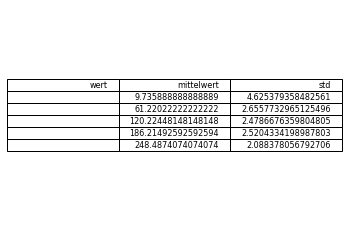

In [28]:
def tabellisieren(ausschnitte):
    fig, ax = plt.subplots()
    table_data = [["wert", "mittelwert", "std"]]
    for i in ausschnitte:
        table_data.append(werteBestimmen(i))
    table = ax.table(cellText=table_data, loc='center')
    ax.axis('off')
    plt.show()
    
def werteBestimmen(bild):
    mittelwert = np.mean(bild)
    std = np.std(bild)
    return ["", mittelwert, std]

def stufenAuslesen(gbild):
    pblack = gbild[100:400, 10:100]
    pdgrey = gbild[100:400, 145:235]
    pmgrey = gbild[100:400, 290:380]
    plgrey = gbild[100:400, 420:510]
    pwhite = gbild[100:400, 550:640]
    ausschnitte = [pblack, pdgrey, pmgrey, plgrey, pwhite]
    return ausschnitte

ausschnitte = stufenAuslesen(gbild)
for p in ausschnitte:
    ausgeben(p)
tabellisieren(ausschnitte)



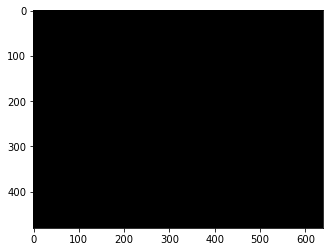

In [29]:
def mittelwert(bilder):
    img = []
    for idx,i in enumerate(bilder):
        img.append(i)
        if (idx == 0):
            a = img[idx]
        else:
            a += img[idx]
    dunkelbild = a/10
    return dunkelbild

dunkelbilder = []
for i in range(10):
    dunkelbilder.append(einlesen(f'Dunkelbild{i}.png'))

dbild = mittelwert(dunkelbilder)
ausgeben(dbild)

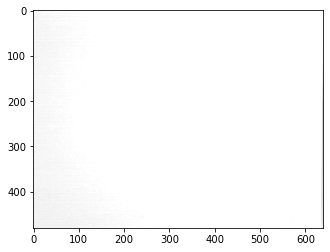

In [30]:
def weissbild(bilder, dunkelbild):
    wbild = mittelwert(bilder) - dunkelbild
    imageio.imwrite('weissbild.png', wbild.astype('uint8'))
    return wbild

weissbilder = []
for i in range(10):
    weissbilder.append(einlesen(f'Weissbild{i}.png'))

wbild = weissbild(weissbilder, dbild)
ausgeben(wbild)


[[[0.96874338 0.96874338 0.96874338]
  [0.96874338 0.96874338 0.96874338]
  [0.96874338 0.96874338 0.96874338]
  ...
  [1.00477103 1.00477103 1.00477103]
  [1.00477103 1.00477103 1.00477103]
  [1.00477103 1.00477103 1.00477103]]

 [[0.96073724 0.96073724 0.96073724]
  [0.96073724 0.96073724 0.96073724]
  [0.96073724 0.96073724 0.96073724]
  ...
  [1.00477103 1.00477103 1.00477103]
  [1.00477103 1.00477103 1.00477103]
  [1.00477103 1.00477103 1.00477103]]

 [[0.96073724 0.96073724 0.96073724]
  [0.96874338 0.96874338 0.96874338]
  [0.96874338 0.96874338 0.96874338]
  ...
  [1.00477103 1.00477103 1.00477103]
  [1.00477103 1.00477103 1.00477103]
  [1.00477103 1.00477103 1.00477103]]

 ...

 [[0.95673417 0.95673417 0.95673417]
  [0.94872803 0.94872803 0.94872803]
  [0.94872803 0.94872803 0.94872803]
  ...
  [0.92871267 0.92871267 0.92871267]
  [0.92070652 0.92070652 0.92070652]
  [0.92070652 0.92070652 0.92070652]]

 [[0.95673417 0.95673417 0.95673417]
  [0.9527311  0.9527311  0.9527311 ]


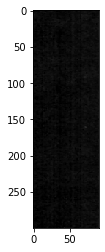

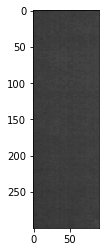

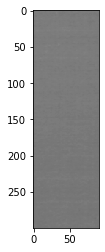

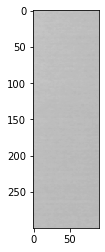

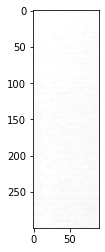

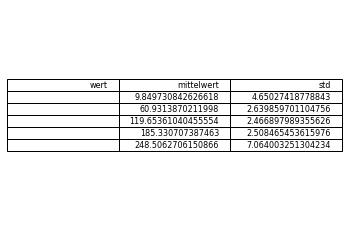

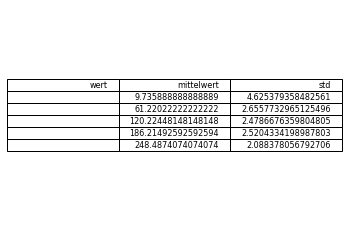

In [31]:
def verbessert(dunkelbild, weissbild, eingabebild):
    weissbild = normieren(weissbild)
    img = eingabebild - dunkelbild
    img = img/weissbild
    return img

def normieren(weissbild):
    mean = np.mean(weissbild)
    for idx, i in enumerate(weissbild):
        weissbild[idx] = i / mean
    return weissbild

print(normieren(wbild))
imgv = verbessert(dbild, wbild, gbild)
imageio.imsave('grauwertverbessert.png', imgv.astype('uint8'))
plt.imshow(imgv/imgv.max())

abschnittev = stufenAuslesen(imgv)
for p in ausschnitte:
    ausgeben(p)
tabellisieren(abschnittev)
tabellisieren(ausschnitte)